In [1]:
# examine ensemble covariances from ensemble zonal mean files:
# initial built: 2024/10/10

import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta

In [2]:
pkfile = 'zonal_mean_ensemble_2022062000.pkl'

In [3]:
# read zonal mean ensemble data:
with open(pkfile, 'rb') as file:
    data = pickle.load(file)

Tens   = data['Tens']
HUMens = data['HUMens']
CLWens = data['CLWens']
Uens   = data['Uens']
Vens   = data['Vens']
lat    = data['lat']
pfull  = data['pfull']

In [4]:
ne, nz, ny = Tens.shape

In [80]:
# select a region 
lat_range   = [-20,   20]
pfull_range = [950, 1000]

lat_idx = np.where( (lat>=lat_range[0])     & (lat<=lat_range[1])     )[0]
lev_idx = np.where( (pfull>=pfull_range[0]) & (pfull<=pfull_range[1]) )[0]


In [81]:
# define the variables within the selected region:
T_sel   = np.zeros(ne)
HUM_sel = np.zeros(ne)
CLW_sel = np.zeros(ne)
U_sel   = np.zeros(ne)
V_sel   = np.zeros(ne)

for i in range(ne):
    T_sel[i]   = np.mean(np.mean(Tens[i,lev_idx[0]:lev_idx[-1], lat_idx[0]:lat_idx[-1]]))
    HUM_sel[i] = np.mean(np.mean(HUMens[i,lev_idx[0]:lev_idx[-1], lat_idx[0]:lat_idx[-1]]))
    CLW_sel[i] = np.mean(np.mean(CLWens[i,lev_idx[0]:lev_idx[-1], lat_idx[0]:lat_idx[-1]]))
    U_sel[i]   = np.mean(np.mean(Uens[i,lev_idx[0]:lev_idx[-1], lat_idx[0]:lat_idx[-1]]))
    V_sel[i]   = np.mean(np.mean(Vens[i,lev_idx[0]:lev_idx[-1], lat_idx[0]:lat_idx[-1]]))

In [86]:
# Calculate the covariance matrix (caution very slow!)

T_T   = np.zeros((nz,ny))
T_HUM = np.zeros((nz,ny))
T_CLW = np.zeros((nz,ny))
T_U   = np.zeros((nz,ny))
T_V   = np.zeros((nz,ny))

HUM_T   = np.zeros((nz,ny))
HUM_HUM = np.zeros((nz,ny))
HUM_CLW = np.zeros((nz,ny))
HUM_U   = np.zeros((nz,ny))
HUM_V   = np.zeros((nz,ny))

CLW_T   = np.zeros((nz,ny))
CLW_HUM = np.zeros((nz,ny))
CLW_CLW = np.zeros((nz,ny))
CLW_U   = np.zeros((nz,ny))
CLW_V   = np.zeros((nz,ny))

U_T   = np.zeros((nz,ny))
U_HUM = np.zeros((nz,ny))
U_CLW = np.zeros((nz,ny))
U_U   = np.zeros((nz,ny))
U_V   = np.zeros((nz,ny))

V_T   = np.zeros((nz,ny))
V_HUM = np.zeros((nz,ny))
V_CLW = np.zeros((nz,ny))
V_U   = np.zeros((nz,ny))
V_V   = np.zeros((nz,ny))

for zz in range(nz):
    if np.mod(zz,5) ==0: print(f' {zz}/{nz-1}')
    for yy in range(ny):
        T_T[zz,yy]   = np.corrcoef(T_sel, Tens[:,zz,yy])[0,1]
        T_HUM[zz,yy] = np.corrcoef(T_sel, HUMens[:,zz,yy])[0,1]
        T_CLW[zz,yy] = np.corrcoef(T_sel, CLWens[:,zz,yy])[0,1]
        T_U[zz,yy]   = np.corrcoef(T_sel, Uens[:,zz,yy])[0,1]
        T_V[zz,yy]   = np.corrcoef(T_sel, Vens[:,zz,yy])[0,1]
        
        HUM_T[zz,yy]   = np.corrcoef(HUM_sel, Tens[:,zz,yy])[0,1]
        HUM_HUM[zz,yy] = np.corrcoef(HUM_sel, HUMens[:,zz,yy])[0,1]
        HUM_CLW[zz,yy] = np.corrcoef(HUM_sel, CLWens[:,zz,yy])[0,1]
        HUM_U[zz,yy]   = np.corrcoef(HUM_sel, Uens[:,zz,yy])[0,1]
        HUM_V[zz,yy]   = np.corrcoef(HUM_sel, Vens[:,zz,yy])[0,1]
        
        CLW_T[zz,yy]   = np.corrcoef(CLW_sel, Tens[:,zz,yy])[0,1]
        CLW_HUM[zz,yy] = np.corrcoef(CLW_sel, HUMens[:,zz,yy])[0,1]
        CLW_CLW[zz,yy] = np.corrcoef(CLW_sel, CLWens[:,zz,yy])[0,1]
        CLW_U[zz,yy]   = np.corrcoef(CLW_sel, Uens[:,zz,yy])[0,1]
        CLW_V[zz,yy]   = np.corrcoef(CLW_sel, Vens[:,zz,yy])[0,1]
        
        U_T[zz,yy]   = np.corrcoef(U_sel, Tens[:,zz,yy])[0,1]
        U_HUM[zz,yy] = np.corrcoef(U_sel, HUMens[:,zz,yy])[0,1]
        U_CLW[zz,yy] = np.corrcoef(U_sel, CLWens[:,zz,yy])[0,1]
        U_U[zz,yy]   = np.corrcoef(U_sel, Uens[:,zz,yy])[0,1]
        U_V[zz,yy]   = np.corrcoef(U_sel, Vens[:,zz,yy])[0,1]

        V_T[zz,yy]   = np.corrcoef(V_sel, Tens[:,zz,yy])[0,1]
        V_HUM[zz,yy] = np.corrcoef(V_sel, HUMens[:,zz,yy])[0,1]
        V_CLW[zz,yy] = np.corrcoef(V_sel, CLWens[:,zz,yy])[0,1]
        V_U[zz,yy]   = np.corrcoef(V_sel, Uens[:,zz,yy])[0,1]
        V_V[zz,yy]   = np.corrcoef(V_sel, Vens[:,zz,yy])[0,1]

 0/90
 5/90
 10/90
 15/90
 20/90
 25/90
 30/90
 35/90
 40/90
 45/90
 50/90
 55/90
 60/90
 65/90
 70/90
 75/90
 80/90
 85/90
 90/90


Text(0.5, 1.0, 'Correlation between HUM (in box) and V (lat, lev)')

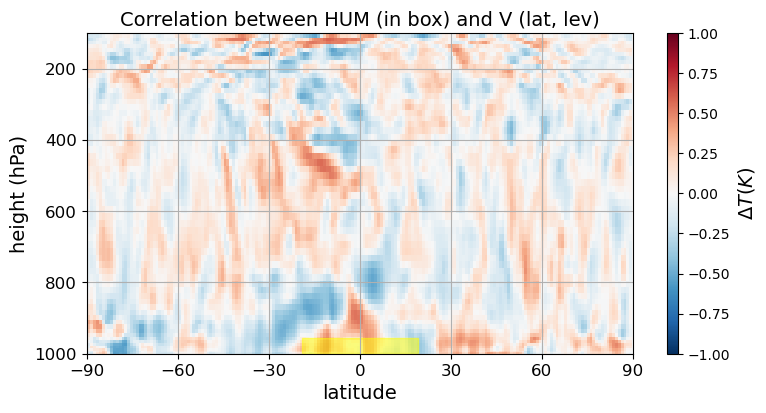

In [94]:
lats, levs = np.meshgrid(lat, pfull)

vmin = -1
vmax =  1

var_in_box = 'HUM' 
var_grid   = 'V'
tmp = f'{var_in_box}_{var_grid}'

plt_var = globals()[tmp]

fig, ax = plt.subplots(figsize=(8,4))
contour1=ax.pcolormesh(lats, levs, plt_var, cmap='RdBu_r', vmin=vmin, vmax=vmax)

# Highlight the region where 2 <= x <= 3 and 3 <= y <= 4
#plt.axvspan(lat[lat_idx[0]],   lat[lat_idx[-1]],   color='black', alpha=0.3)  # Highlight x region
#plt.axhspan(pfull[lev_idx[0]], pfull[lev_idx[-1]], color='black', alpha=0.3)  # Highlight y region

# Plot the outline of the region where both conditions are met
plt.fill_betweenx([pfull[lev_idx[0]], pfull[lev_idx[-1]]], lat[lat_idx[0]],   lat[lat_idx[-1]], color='yellow', alpha=0.5)

ax.set_ylim(1000,100)
ax.set_xlabel('latitude',fontsize=14)
ax.set_xticks([-90,-60,-30,0,30,60,90])
ax.set_ylabel('height (hPa)',fontsize=14)
ax.set_yticks([1000,800,600,400,200])
ax.tick_params(axis='x', labelsize=12)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=12)  # Set the size to 14 points
ax.grid(True)
plt.tight_layout()

cbar = fig.colorbar(contour1,location='right',aspect=30)
#cbar.set_ticks([-6,-4,-2,0,2,4,6])  # Set the tick positions
#cbar.set_ticklabels(['Low', 'Medium', 'Medium-High', 'High', 'Very High'])  # Set the tick labels

cbar.set_label('$\Delta T (K)$', fontsize=14)
ax.set_title(f'Correlation between {var_in_box} (in box) and {var_grid} (lat, lev)',fontsize=14)
#plt.savefig(f'T_inc_monthly_avg_{exp}.png', dpi=200, bbox_inches='tight')

In [16]:
T_sel.shape

(80,)

In [7]:
T_sel

array([290.86236414, 290.89240002, 290.86986296, 290.84177446,
       290.8608852 , 290.86019556, 290.85122438, 290.84577975,
       290.88443028, 290.84805053, 290.85857577, 290.84088496,
       290.86837038, 290.86307934, 290.85118786, 290.87390714,
       290.8520673 , 290.89366819, 290.87223939, 290.83848917,
       290.86738921, 290.84688316, 290.8233632 , 290.8574913 ,
       290.82913034, 290.84667055, 290.87927438, 290.83124374,
       290.82503207, 290.85486837, 290.83864229, 290.88083465,
       290.84331456, 290.85668959, 290.86250129, 290.86774752,
       290.88415347, 290.84106646, 290.83645388, 290.86620559,
       290.82566785, 290.77688673, 290.81335421, 290.79123572,
       290.80861174, 290.80033745, 290.792289  , 290.79984641,
       290.83994316, 290.7725197 , 290.81088112, 290.81557025,
       290.82156513, 290.807186  , 290.80985937, 290.80405114,
       290.79007341, 290.84912305, 290.80647119, 290.80255981,
       290.84364165, 290.80281567, 290.78987657, 290.81

In [8]:
Tens.shape

(80, 91, 192)

In [38]:
Tens[1, 68:90, 1:5]

array([[262.34262085, 261.69699097, 261.0526123 , 260.52578735],
       [263.36282349, 262.6947937 , 262.07272339, 261.59640503],
       [264.27575684, 263.60714722, 263.01187134, 262.60549927],
       [265.10528564, 264.44702148, 263.87646484, 263.52938843],
       [265.86160278, 265.228302  , 264.69390869, 264.40148926],
       [266.5463562 , 265.94534302, 265.47064209, 265.22833252],
       [267.16616821, 266.60739136, 266.19723511, 265.99484253],
       [267.72299194, 267.22070312, 266.88763428, 266.72021484],
       [268.22647095, 267.80374146, 267.54492188, 267.40887451],
       [268.68887329, 268.35449219, 268.17199707, 268.06204224],
       [269.14434814, 268.88391113, 268.77355957, 268.67758179],
       [269.56237793, 269.38513184, 269.34335327, 269.26400757],
       [269.96365356, 269.86929321, 269.89276123, 269.82022095],
       [270.35177612, 270.32662964, 270.40481567, 270.34161377],
       [270.73269653, 270.7562561 , 270.87454224, 270.82666016],
       [271.10574341, 271